In [ ]:
# Importarcion librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Cargar dataSet con limpieza de datos de Knime
dataSet = pd.read_csv('https://raw.githubusercontent.com/JohamSMC/electiva4/master/dataSets/dataSet-horse-colic-Knime.csv', sep=',', na_values=['?'])
dataSet

,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,pain,peristalsis,abdominal_distension,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_PH,rectal_examination_-_feces,abdomen,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,surgical_lesion
0,1,38.5,66,28,3,3,3,2,5,4,4,2,2,5.0,3,5,45.0,8.4,2,3.0,2,2
1,1,39.2,88,20,2,2,4,1,3,4,2,2,2,5.0,4,2,50.0,85.0,2,2.0,2,2
2,1,38.3,40,24,1,1,3,1,3,3,1,2,2,5.0,1,1,33.0,6.7,2,3.0,1,2
3,9,39.1,164,84,4,1,6,2,2,4,4,1,2,5.0,3,4,48.0,7.2,3,5.3,2,1
4,1,37.3,104,35,2,2,6,2,3,3,2,2,2,5.0,3,4,74.0,7.4,2,3.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,38.0,120,70,4,2,4,2,2,4,2,2,2,5.0,3,5,55.0,65.0,2,3.0,2,2
296,1,37.2,72,24,3,2,4,2,4,3,3,3,1,5.0,4,4,44.0,24.0,3,3.3,2,1
297,1,37.5,72,30,4,3,4,1,4,4,3,2,1,5.0,3,5,60.0,6.8,2,3.0,2,1
298,1,36.5,100,24,3,3,3,1,3,3,3,3,1,5.0,4,4,50.0,6.0,3,3.4,1,1


In [ ]:
# Se separa el atributo objetivo(target) en "y" y los demas atributos en "X"
X = dataSet.drop(['outcome'],axis=1)
y = dataSet['outcome']

In [ ]:
# Definir semilla y tamaño del conjuto de prueba
seed =123
test_size=0.2

# **Splitting Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = test_size, random_state = seed)

# **Árbol de decisión**

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy")
#clf = DecisionTreeClassifier(criterion="gini")
# Entrenar Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predecir la respuesta para el conjunto de datos de prueba
y_pred = clf.predict(X_test)

In [ ]:
# Profundidad del arbol de decisión.
print("Score Arbol: ",clf.score(X_test,y_test))
print("Max Depth del arbol: ",clf.tree_.max_depth)

Score Arbol:  0.7166666666666667
Max Depth del arbol:  20


In [ ]:
# Resultados

#print("Numbero de observaciones mal etiquetadas del total de %d observaciones : %d" %(X_test.shape[0], (y_test != y_pred).sum()))
print("Numero de datos en test:",X_test.shape[0])
print("Numero de aciertos:",metrics.accuracy_score(y_test,y_pred,normalize=False))
print("Numero de desaciertos:",(y_test != y_pred).sum())
print("Exactitud(Accuracy):",metrics.accuracy_score(y_test,y_pred))

# Matriz de Confución
print("\n\t---Matriz de Confución Árbol de decisión---")
# print(metrics.confusion_matrix(y_test,y_pred))
VN,FP,FN,VP = metrics.confusion_matrix(y_test,y_pred).ravel()
print("VN \t FP")
print(VN," \t ",FP)
print("FN \t VP")
print(FN," \t ",VP)

Numero de datos en test: 60
Numero de aciertos: 43
Numero de desaciertos: 17
Exactitud(Accuracy): 0.7166666666666667

	---Matriz de Confución Árbol de decisión---
VN 	 FP
30  	  9
FN 	 VP
8  	  13


# **Metricas de Calidad**

In [ ]:
from sklearn import metrics

## ***Matriz de Confusión***

In [ ]:
matriz = metrics.confusion_matrix(y_test,y_pred)
print(matriz)

[[30  9]
 [ 8 13]]


## ***Exactitud***

In [ ]:
#exactitud = metrics.accuracy_score(y_test,y_pred,normalize=False)
exactitud = metrics.accuracy_score(y_test,y_pred)
print(exactitud)

0.7166666666666667


## ***Precisión***

In [ ]:
precision =  metrics.precision_score(y_test,y_pred)
print(precision)

0.7894736842105263


## ***Sensibilidad***

In [ ]:
sensibilidad =  metrics.recall_score(y_test,y_pred)
print(sensibilidad)

0.7692307692307693


## ***Puntaje de F1***

In [ ]:
puntajeF1 =  metrics.f1_score(y_test,y_pred)
print(puntajeF1)

0.7792207792207793


# **Curva lift**

In [ ]:
!pip install scikit-plot

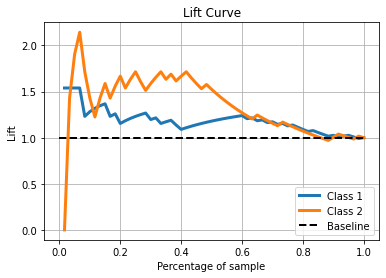

In [ ]:
import matplotlib.pyplot as plt
import scikitplot as skplt
# Debemos predecir la probabilidad
y_pred = clf.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_pred, title='Lift Curve')
plt.show()

# **Curva ROC**

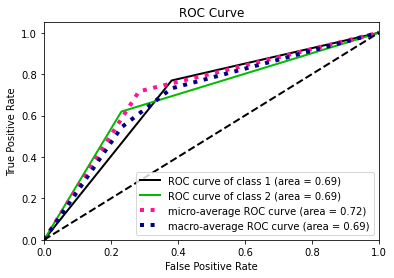

In [ ]:
# Debemos predecir la probabilidad
y_pred = clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred,title='ROC Curve')
plt.show()